In [87]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import csv
import numpy as np
import math as m

# Processing EMG data for 5 healthy subjects
Finding the amount of co-contraction

In [88]:
def normalise(signal1, signal2, MVC_M1_SCALED, MVC_M2_SCALED):
    ''' 
    A function that normalises the raw EMG signals for muscle 1 and 2
    outputs the normalised muscle contraction values for m1 and m2
    '''
    s1_normal = int(signal1/MVC_M1_SCALED *100)
    s2_normal = int(signal2/MVC_M2_SCALED *100)
    return s1_normal, s2_normal


def find_flex_data(emg1, emg2):
    ''' 
    A function that finds the EMG data during flexion
    '''
    flex_x = []
    flex_y = []
    for i in range(len(emg1)):
        if emg2[i] > emg1[i]:
            flex_x.append(emg1[i])
            flex_y.append(emg2[i])
    return flex_x, flex_y


def find_ex_data(emg1, emg2):
    ''' 
    A function that finds the EMG data during extension
    '''
    ex_x = []
    ex_y = []
    for i in range(len(emg2)):
        if emg1[i] > emg2[i]:
            ex_x.append(emg1[i])
            ex_y.append(emg2[i])
    return ex_x, ex_y

# Subject 1, age: 26

open the files and save the EMG signals into lists

In [89]:
# MVC,205,MVC,259

MVC_M1 = 205
MVC_M2 = 259
 
MVC_M1_SCALED = MVC_M1*0.8
MVC_M2_SCALED = MVC_M2*0.8


with open('EMG_Users\Bjarki_raw_nofeedback.csv') as file:
        csv_reader = csv.reader(file, delimiter=',')

        line_count = 0
        emg1_raw = []
        emg2_raw = []
        emg1_norm = []
        emg2_norm = []
        for row in csv_reader:
            line_count += 1
            if line_count > 2:
                emg1, emg2 = map(int, row)
                M1_norm, M2_norm = normalise(emg1, emg2, MVC_M1_SCALED, MVC_M1_SCALED)
                emg1_raw.append(emg1)
                emg2_raw.append(emg2)
                emg1_norm.append(M1_norm)
                emg2_norm.append(M2_norm)


with open('EMG_Users\Bjarki_raw_feedback.csv') as file:
        csv_reader = csv.reader(file, delimiter=',')

        line_count = 0
        emg1_raw_feed = []
        emg2_raw_feed = []
        emg1_norm_feed = []
        emg2_norm_feed = []
        for row in csv_reader:
            line_count += 1
            if line_count > 2:
                emg1_feed, emg2_feed = map(int, row)
                M1_norm_feed, M2_norm_feed = normalise(emg1_feed, emg2_feed, MVC_M1_SCALED, MVC_M1_SCALED)
                emg1_raw_feed.append(emg1_feed)
                emg2_raw_feed.append(emg2_feed)
                emg1_norm_feed.append(M1_norm_feed)
                emg2_norm_feed.append(M2_norm_feed)

No Feedback

slope flex: 9.109303220126234, y axis flex: 0
slope ex: 0.21773272980581238, y axis ex: 0


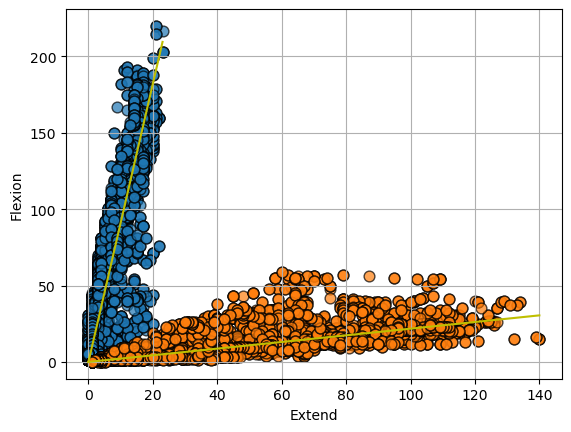

In [90]:
# taking only for the flexion and then extension, normalised NO FB
flex_x, flex_y = find_flex_data(emg1_norm, emg2_norm)
ex_x, ex_y = find_ex_data(emg1_norm, emg2_norm)


# filter outliers for flexion
flex_x_filter = []
flex_y_filter = []
for i in range(len(flex_x)):
    if (flex_x[i] > 20 and flex_y[i] < 75):
        pass
    else:
        flex_x_filter.append(flex_x[i])
        flex_y_filter.append(flex_y[i])

# change lists to numpy array for the polyfit
# NO FB
sub1_flex_x = np.array(flex_x_filter)
sub1_flex_y = np.array(flex_y_filter)
sub1_ex_x = np.array(ex_x)
sub1_ex_y = np.array(ex_y)

#find line of best fit
# NO FB
sub1_a, sub1_b = np.polyfit(sub1_flex_x, sub1_flex_y, 1)
sub1_b = 0
print(f"slope flex: {sub1_a}, y axis flex: {sub1_b}")
sub1_c, sub1_d = np.polyfit(sub1_ex_x, sub1_ex_y, 1)
sub1_d = 0
print(f"slope ex: {sub1_c}, y axis ex: {sub1_d}")


#add points to plot
plt.scatter(sub1_flex_x, sub1_flex_y, s=60, alpha=0.7, edgecolors="k")
plt.scatter(sub1_ex_x,   sub1_ex_y,   s=60, alpha=0.7, edgecolors="k")


#add line of best fit to plot
# Create sequence of 100 numbers from 0 to max value
sub1_xseq_flex = np.linspace(0, max(sub1_flex_x), num=100)
plt.plot(sub1_xseq_flex, sub1_a*sub1_xseq_flex+sub1_b, color='y')

# Create sequence of 100 numbers from 0 to max value
sub1_xseq_ex = np.linspace(0, max(sub1_ex_x), num=100)
plt.plot(sub1_xseq_ex, sub1_c*sub1_xseq_ex+sub1_d, color='y')

plt.xlabel("Extend")
plt.ylabel("Flexion")
plt.grid()
plt.show() 

With feedback

feedback, slope flex: 10.494207460640197, feedback, y axis flex: 0
feedback, slope ex: 0.312606456775882, feedback, y axis flex: 0


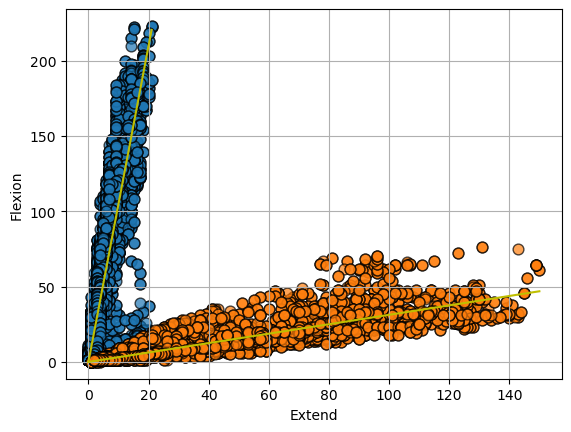

In [91]:
# normalised WITH FB
flex_x_feed, flex_y_feed = find_flex_data(emg1_norm_feed, emg2_norm_feed)
ex_x_feed, ex_y_feed = find_ex_data(emg1_norm_feed, emg2_norm_feed)



# filter outliers for flexion
flex_x_feed_filter = []
flex_y_feed_filter = []
for i in range(len(flex_x_feed)):
    if (flex_x_feed[i] > 20 and flex_y_feed[i] < 75):
        pass
    else:
        flex_x_feed_filter.append(flex_x_feed[i])
        flex_y_feed_filter.append(flex_y_feed[i])

# WITH FB, create numpy arrays
sub1_flex_x_feed = np.array(flex_x_feed_filter)
sub1_flex_y_feed = np.array(flex_y_feed_filter)
sub1_ex_x_feed = np.array(ex_x_feed)
sub1_ex_y_feed = np.array(ex_y_feed)


# find line of best fit
# WITH FB
sub1_a_feed, sub1_b_feed = np.polyfit(sub1_flex_x_feed, sub1_flex_y_feed, 1)
sub1_b_feed = 0
print(f"feedback, slope flex: {sub1_a_feed}, feedback, y axis flex: {sub1_b_feed}")
sub1_c_feed, sub1_d_feed = np.polyfit(sub1_ex_x_feed, sub1_ex_y_feed, 1)
sub1_d_feed = 0
print(f"feedback, slope ex: {sub1_c_feed}, feedback, y axis flex: {sub1_d_feed}")

plt.scatter(sub1_flex_x_feed, sub1_flex_y_feed, s=60, alpha=0.7, edgecolors="k")
plt.scatter(sub1_ex_x_feed, sub1_ex_y_feed,     s=60, alpha=0.7, edgecolors="k")

# Create sequence of 100 numbers from 0 to max value
sub1_xseq_flex_feed = np.linspace(0, max(sub1_flex_x_feed), num=100)
plt.plot(sub1_xseq_flex_feed, sub1_a_feed*sub1_xseq_flex_feed+sub1_b_feed, color='y')

# Create sequence of 100 numbers from 0 to max value
sub1_xseq_ex_feed = np.linspace(0, max(sub1_ex_x_feed), num=100)
plt.plot(sub1_xseq_ex_feed, sub1_c_feed*sub1_xseq_ex_feed+sub1_d_feed, color='y')

plt.xlabel("Extend")
plt.ylabel("Flexion")
plt.grid()
plt.show() 

Plot together

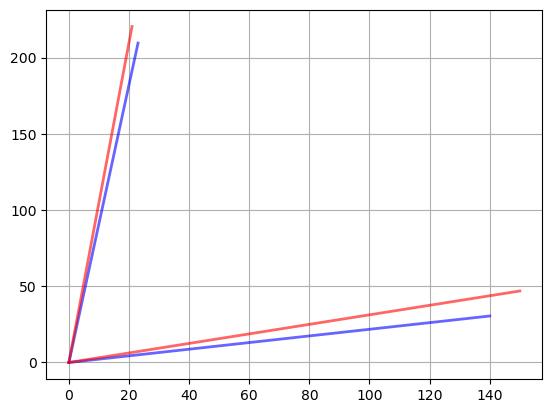

In [92]:

# Subject 1
# without feedback
plt.plot(sub1_xseq_flex, sub1_a*sub1_xseq_flex+sub1_b, color='b',  alpha = 0.6, linewidth = 2)
plt.plot(sub1_xseq_ex,   sub1_c*sub1_xseq_ex+sub1_d,   color='b' , alpha = 0.6, linewidth = 2)
# with feedback
plt.plot(sub1_xseq_flex_feed, sub1_a_feed*sub1_xseq_flex_feed+sub1_b_feed, color='r' , alpha = 0.6 , linewidth = 2)
plt.plot(sub1_xseq_ex_feed,   sub1_c_feed*sub1_xseq_ex_feed+sub1_d_feed,   color='r' , alpha = 0.6 , linewidth = 2)

plt.grid()
plt.show() 

# Subject 2, age: 27

In [93]:
# MVC,260,MVC,239

MVC_M1 = 260
MVC_M2 = 239
 
MVC_M1_SCALED = MVC_M1*0.8
MVC_M2_SCALED = MVC_M2*0.8


with open('EMG_Users\Linda_raw_nofeedback.csv') as file:
        csv_reader = csv.reader(file, delimiter=',')

        line_count = 0
        emg1_raw = []
        emg2_raw = []
        emg1_norm = []
        emg2_norm = []
        for row in csv_reader:
            line_count += 1
            if line_count > 2:
                emg1, emg2 = map(int, row)
                M1_norm, M2_norm = normalise(emg1, emg2, MVC_M1_SCALED, MVC_M1_SCALED)
                emg1_raw.append(emg1)
                emg2_raw.append(emg2)
                emg1_norm.append(M1_norm)
                emg2_norm.append(M2_norm)


with open('EMG_Users\Linda_raw_feedback.csv') as file:
        csv_reader = csv.reader(file, delimiter=',')

        line_count = 0
        emg1_raw_feed = []
        emg2_raw_feed = []
        emg1_norm_feed = []
        emg2_norm_feed = []
        for row in csv_reader:
            line_count += 1
            if line_count > 2:
                emg1_feed, emg2_feed = map(int, row)
                M1_norm_feed, M2_norm_feed = normalise(emg1_feed, emg2_feed, MVC_M1_SCALED, MVC_M1_SCALED)
                emg1_raw_feed.append(emg1_feed)
                emg2_raw_feed.append(emg2_feed)
                emg1_norm_feed.append(M1_norm_feed)
                emg2_norm_feed.append(M2_norm_feed)

No feedback

slope flex: 5.703210598541158, y axis flex: 0
slope ex: 0.03211461832154884, y axis ex: 0


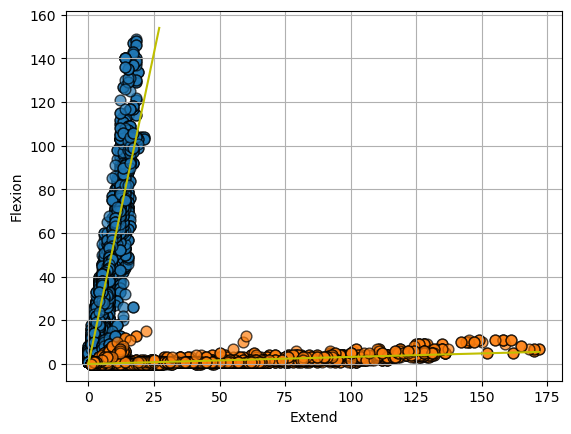

In [94]:
# taking only for the flexion and then extension, normalised NO FB
flex_x, flex_y = find_flex_data(emg1_norm, emg2_norm)
ex_x, ex_y = find_ex_data(emg1_norm, emg2_norm)


# filter outliers for flexion
flex_x_filter = []
flex_y_filter = []
for i in range(len(flex_x)):
    if (flex_x[i] > 20 and flex_y[i] < 55):
        pass
    else:
        flex_x_filter.append(flex_x[i])
        flex_y_filter.append(flex_y[i])
# filter outliers for extension
ex_x_filter = []
ex_y_filter = []
for i in range(len(ex_x)):
    if (ex_x[i] > 15 and ex_y[i] > 15):
        pass
    else:
        ex_x_filter.append(ex_x[i])
        ex_y_filter.append(ex_y[i])

# change lists to numpy array for the polyfit
# NO FB
sub2_flex_x = np.array(flex_x_filter)
sub2_flex_y = np.array(flex_y_filter)
sub2_ex_x = np.array(ex_x_filter)
sub2_ex_y = np.array(ex_y_filter)

#find line of best fit
# NO FB
sub2_a, sub2_b = np.polyfit(sub2_flex_x, sub2_flex_y, 1)
sub2_b = 0
print(f"slope flex: {sub2_a}, y axis flex: {sub2_b}")
sub2_c, sub2_d = np.polyfit(sub2_ex_x, sub2_ex_y, 1)
sub2_d = 0
print(f"slope ex: {sub2_c}, y axis ex: {sub2_d}")


#add points to plot
plt.scatter(sub2_flex_x, sub2_flex_y, s=60, alpha=0.7, edgecolors="k")
plt.scatter(sub2_ex_x,   sub2_ex_y,   s=60, alpha=0.7, edgecolors="k")


#add line of best fit to plot
# Create sequence of 100 numbers from 0 to max value
sub2_xseq_flex = np.linspace(0, 27, num=100)
plt.plot(sub2_xseq_flex, sub2_a*sub2_xseq_flex+sub2_b, color='y')

# Create sequence of 100 numbers from 0 to max value
sub2_xseq_ex = np.linspace(0, max(sub2_ex_x), num=100)
plt.plot(sub2_xseq_ex, sub2_c*sub2_xseq_ex+sub2_d, color='y')

plt.xlabel("Extend")
plt.ylabel("Flexion")
plt.grid()
plt.show() 

With feedback

feedback, slope flex: 5.467053081053453, feedback, y axis flex: 0
feedback, slope ex: 0.033882387299654, feedback, y axis flex: 0


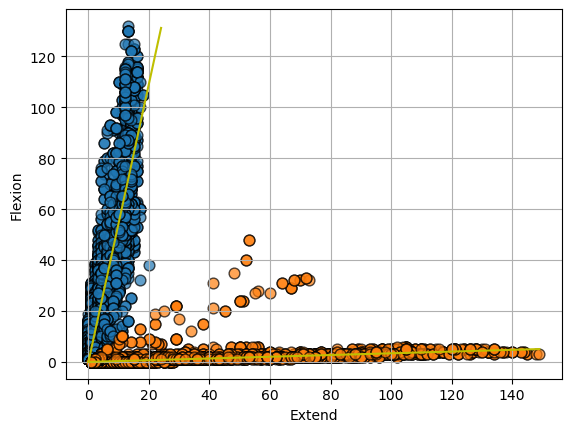

In [95]:
# normalised WITH FB
flex_x_feed, flex_y_feed = find_flex_data(emg1_norm_feed, emg2_norm_feed)
ex_x_feed, ex_y_feed = find_ex_data(emg1_norm_feed, emg2_norm_feed)



# filter outliers for flexion
flex_x_feed_filter = []
flex_y_feed_filter = []
for i in range(len(flex_x_feed)):
    if (flex_x_feed[i] > 20 and flex_y_feed[i] < 100):
        pass
    else:
        flex_x_feed_filter.append(flex_x_feed[i])
        flex_y_feed_filter.append(flex_y_feed[i])

# WITH FB, create numpy arrays
sub2_flex_x_feed = np.array(flex_x_feed_filter)
sub2_flex_y_feed = np.array(flex_y_feed_filter)
sub2_ex_x_feed = np.array(ex_x_feed)
sub2_ex_y_feed = np.array(ex_y_feed)


# find line of best fit
# WITH FB
sub2_a_feed, sub2_b_feed = np.polyfit(sub2_flex_x_feed, sub2_flex_y_feed, 1)
sub2_b_feed = 0
print(f"feedback, slope flex: {sub2_a_feed}, feedback, y axis flex: {sub2_b_feed}")
sub2_c_feed, sub2_d_feed = np.polyfit(sub2_ex_x_feed, sub2_ex_y_feed, 1)
sub2_d_feed = 0
print(f"feedback, slope ex: {sub2_c_feed}, feedback, y axis flex: {sub2_d_feed}")

plt.scatter(sub2_flex_x_feed, sub2_flex_y_feed,   s=60, alpha=0.7, edgecolors="k")
plt.scatter(sub2_ex_x_feed,   sub2_ex_y_feed,     s=60, alpha=0.7, edgecolors="k")

# Create sequence of 100 numbers from 0 to max value
sub2_xseq_flex_feed = np.linspace(0, 24, num=100)
plt.plot(sub2_xseq_flex_feed, sub2_a_feed*sub2_xseq_flex_feed+sub2_b_feed, color='y')

# Create sequence of 100 numbers from 0 to max value
sub2_xseq_ex_feed = np.linspace(0, max(sub2_ex_x_feed), num=100)
plt.plot(sub2_xseq_ex_feed, sub2_c_feed*sub2_xseq_ex_feed+sub2_d_feed, color='y')

plt.xlabel("Extend")
plt.ylabel("Flexion")
plt.grid()
plt.show() 

Plot together

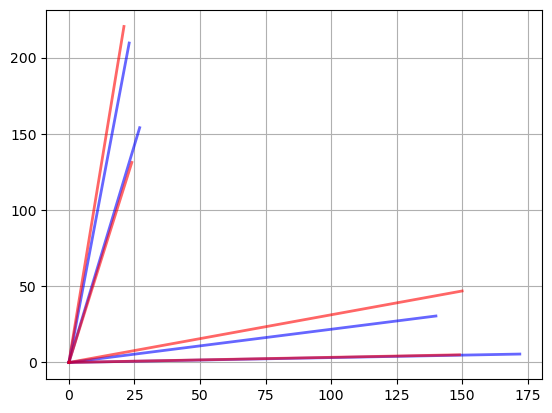

In [96]:
# Subject 1
# without feedback
plt.plot(sub1_xseq_flex, sub1_a*sub1_xseq_flex+sub1_b, color='b',  alpha = 0.6, linewidth = 2)
plt.plot(sub1_xseq_ex,   sub1_c*sub1_xseq_ex+sub1_d,   color='b' , alpha = 0.6, linewidth = 2)
# with feedback
plt.plot(sub1_xseq_flex_feed, sub1_a_feed*sub1_xseq_flex_feed+sub1_b_feed, color='r' , alpha = 0.6 , linewidth = 2)
plt.plot(sub1_xseq_ex_feed,   sub1_c_feed*sub1_xseq_ex_feed+sub1_d_feed,   color='r' , alpha = 0.6 , linewidth = 2)

# Subject 2
# without feedback
plt.plot(sub2_xseq_flex, sub2_a*sub2_xseq_flex+sub2_b, color='b',  alpha = 0.6, linewidth = 2)
plt.plot(sub2_xseq_ex,   sub2_c*sub2_xseq_ex  +sub2_d, color='b' , alpha = 0.6, linewidth = 2)
# with feedback
plt.plot(sub2_xseq_flex_feed, sub2_a_feed*sub2_xseq_flex_feed+sub2_b_feed, color='r' , alpha = 0.6 , linewidth = 2)
plt.plot(sub2_xseq_ex_feed,   sub2_c_feed*sub2_xseq_ex_feed  +sub2_d_feed, color='r' , alpha = 0.6 , linewidth = 2)

plt.grid()
plt.show() 

# Subject 3, Age: 26

In [97]:
# MVC,150,MVC,340

MVC_M1 = 150
MVC_M2 = 340
 
MVC_M1_SCALED = MVC_M1*0.8
MVC_M2_SCALED = MVC_M2*0.8


with open('EMG_Users\Maxim_raw_nofeedback.csv') as file:
        csv_reader = csv.reader(file, delimiter=',')

        line_count = 0
        emg1_raw = []
        emg2_raw = []
        emg1_norm = []
        emg2_norm = []
        for row in csv_reader:
            line_count += 1
            if line_count > 2:
                emg1, emg2 = map(int, row)
                M1_norm, M2_norm = normalise(emg1, emg2, MVC_M1_SCALED, MVC_M1_SCALED)
                emg1_raw.append(emg1)
                emg2_raw.append(emg2)
                emg1_norm.append(M1_norm)
                emg2_norm.append(M2_norm)


with open('EMG_Users\Maxim_raw_feedback.csv') as file:
        csv_reader = csv.reader(file, delimiter=',')

        line_count = 0
        emg1_raw_feed = []
        emg2_raw_feed = []
        emg1_norm_feed = []
        emg2_norm_feed = []
        for row in csv_reader:
            line_count += 1
            if line_count > 2:
                emg1_feed, emg2_feed = map(int, row)
                M1_norm_feed, M2_norm_feed = normalise(emg1_feed, emg2_feed, MVC_M1_SCALED, MVC_M1_SCALED)
                emg1_raw_feed.append(emg1_feed)
                emg2_raw_feed.append(emg2_feed)
                emg1_norm_feed.append(M1_norm_feed)
                emg2_norm_feed.append(M2_norm_feed)

No feedback

slope flex: 5.790341369477634, y axis flex: 0
slope ex: 0.3370207889059026, y axis ex: 0


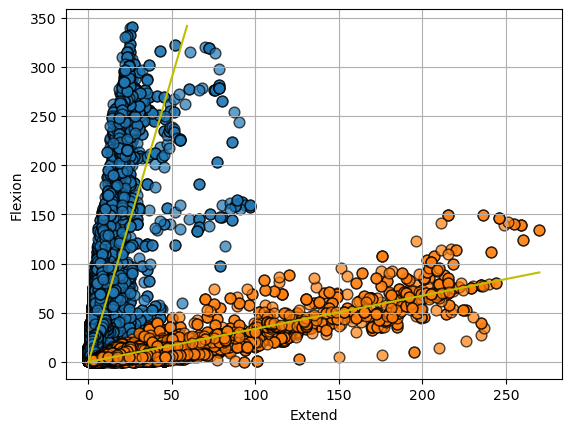

In [98]:
# taking only for the flexion and then extension, normalised NO FB
flex_x, flex_y = find_flex_data(emg1_norm, emg2_norm)
ex_x, ex_y = find_ex_data(emg1_norm, emg2_norm)



# change lists to numpy array for the polyfit
# NO FB
sub3_flex_x = np.array(flex_x)
sub3_flex_y = np.array(flex_y)
sub3_ex_x = np.array(ex_x)
sub3_ex_y = np.array(ex_y)

#find line of best fit
# NO FB
sub3_a, sub3_b = np.polyfit(sub3_flex_x, sub3_flex_y, 1)
sub3_b = 0
print(f"slope flex: {sub3_a}, y axis flex: {sub3_b}")
sub3_c, sub3_d = np.polyfit(sub3_ex_x, sub3_ex_y, 1)
sub3_d = 0
print(f"slope ex: {sub3_c}, y axis ex: {sub3_d}")


#add points to plot
plt.scatter(sub3_flex_x, sub3_flex_y, s=60, alpha=0.7, edgecolors="k")
plt.scatter(sub3_ex_x,   sub3_ex_y,   s=60, alpha=0.7, edgecolors="k")


#add line of best fit to plot
# Create sequence of 100 numbers from 0 to max value
sub3_xseq_flex = np.linspace(0, 59, num=100)
plt.plot(sub3_xseq_flex, sub3_a*sub3_xseq_flex+sub3_b, color='y')

# Create sequence of 100 numbers from 0 to max value
sub3_xseq_ex = np.linspace(0, max(sub3_ex_x), num=100)
plt.plot(sub3_xseq_ex, sub3_c*sub3_xseq_ex+sub3_d, color='y')

plt.xlabel("Extend")
plt.ylabel("Flexion")
plt.grid()
plt.show() 

With feedback

feedback, slope flex: 8.412576499697517, feedback, y axis flex: 0
feedback, slope ex: 0.3482421221877662, feedback, y axis flex: 0


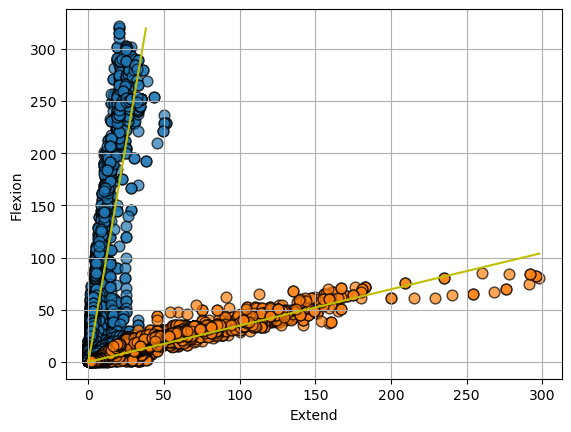

In [99]:
# normalised WITH FB
flex_x_feed, flex_y_feed = find_flex_data(emg1_norm_feed, emg2_norm_feed)
ex_x_feed, ex_y_feed = find_ex_data(emg1_norm_feed, emg2_norm_feed)


# WITH FB, create numpy arrays
sub3_flex_x_feed = np.array(flex_x_feed)
sub3_flex_y_feed = np.array(flex_y_feed)
sub3_ex_x_feed = np.array(ex_x_feed)
sub3_ex_y_feed = np.array(ex_y_feed)


# find line of best fit
# WITH FB
sub3_a_feed, sub3_b_feed = np.polyfit(sub3_flex_x_feed, sub3_flex_y_feed, 1)
sub3_b_feed = 0
print(f"feedback, slope flex: {sub3_a_feed}, feedback, y axis flex: {sub3_b_feed}")
sub3_c_feed, sub3_d_feed = np.polyfit(sub3_ex_x_feed, sub3_ex_y_feed, 1)
sub3_d_feed = 0
print(f"feedback, slope ex: {sub3_c_feed}, feedback, y axis flex: {sub3_d_feed}")

plt.scatter(sub3_flex_x_feed, sub3_flex_y_feed,   s=60, alpha=0.7, edgecolors="k")
plt.scatter(sub3_ex_x_feed,   sub3_ex_y_feed,     s=60, alpha=0.7, edgecolors="k")

# Create sequence of 100 numbers from 0 to max value
sub3_xseq_flex_feed = np.linspace(0, 38, num=100)
plt.plot(sub3_xseq_flex_feed, sub3_a_feed*sub3_xseq_flex_feed+sub3_b_feed, color='y')

# Create sequence of 100 numbers from 0 to max value
sub3_xseq_ex_feed = np.linspace(0, max(sub3_ex_x_feed), num=100)
plt.plot(sub3_xseq_ex_feed, sub3_c_feed*sub3_xseq_ex_feed+sub3_d_feed, color='y')

plt.xlabel("Extend")
plt.ylabel("Flexion")
plt.grid()
plt.show() 

Plot together

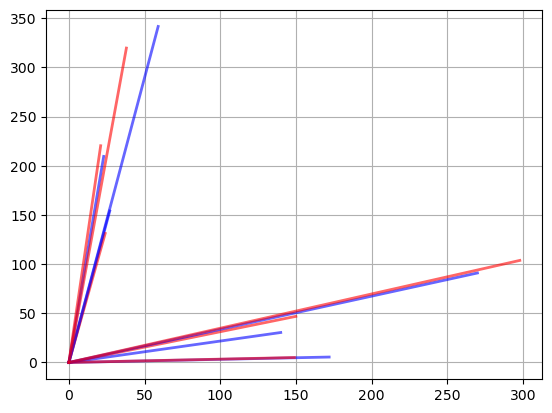

In [100]:
# Subject 1
# without feedback
plt.plot(sub1_xseq_flex, sub1_a*sub1_xseq_flex+sub1_b, color='b',  alpha = 0.6, linewidth = 2)
plt.plot(sub1_xseq_ex,   sub1_c*sub1_xseq_ex+sub1_d,   color='b' , alpha = 0.6, linewidth = 2)
# with feedback
plt.plot(sub1_xseq_flex_feed, sub1_a_feed*sub1_xseq_flex_feed+sub1_b_feed, color='r' , alpha = 0.6 , linewidth = 2)
plt.plot(sub1_xseq_ex_feed,   sub1_c_feed*sub1_xseq_ex_feed+sub1_d_feed,   color='r' , alpha = 0.6 , linewidth = 2)

# Subject 2
# without feedback
plt.plot(sub2_xseq_flex, sub2_a*sub2_xseq_flex+sub2_b, color='b',  alpha = 0.6, linewidth = 2)
plt.plot(sub2_xseq_ex,   sub2_c*sub2_xseq_ex  +sub2_d, color='b' , alpha = 0.6, linewidth = 2)
# with feedback
plt.plot(sub2_xseq_flex_feed, sub2_a_feed*sub2_xseq_flex_feed+sub2_b_feed, color='r' , alpha = 0.6 , linewidth = 2)
plt.plot(sub2_xseq_ex_feed,   sub2_c_feed*sub2_xseq_ex_feed  +sub2_d_feed, color='r' , alpha = 0.6 , linewidth = 2)

# Subject 3
# without feedback
plt.plot(sub3_xseq_flex, sub3_a*sub3_xseq_flex+sub3_b, color='b',  alpha = 0.6, linewidth = 2)
plt.plot(sub3_xseq_ex,   sub3_c*sub3_xseq_ex  +sub3_d, color='b' , alpha = 0.6, linewidth = 2)
# with feedback
plt.plot(sub3_xseq_flex_feed, sub3_a_feed*sub3_xseq_flex_feed+sub3_b_feed, color='r' , alpha = 0.6 , linewidth = 2)
plt.plot(sub3_xseq_ex_feed,   sub3_c_feed*sub3_xseq_ex_feed  +sub3_d_feed, color='r' , alpha = 0.6 , linewidth = 2)

plt.grid()
plt.show() 

# Subject 4, Age: 25

In [101]:
# MVC,180,MVC,400

MVC_M1 = 180
MVC_M2 = 400
 
MVC_M1_SCALED = MVC_M1*0.8
MVC_M2_SCALED = MVC_M2*0.8


with open('EMG_Users\Eric_raw_nofeedback.csv') as file:
        csv_reader = csv.reader(file, delimiter=',')

        line_count = 0
        emg1_raw = []
        emg2_raw = []
        emg1_norm = []
        emg2_norm = []
        for row in csv_reader:
            line_count += 1
            if line_count > 2:
                emg1, emg2 = map(int, row)
                M1_norm, M2_norm = normalise(emg1, emg2, MVC_M1_SCALED, MVC_M1_SCALED)
                emg1_raw.append(emg1)
                emg2_raw.append(emg2)
                emg1_norm.append(M1_norm)
                emg2_norm.append(M2_norm)


with open('EMG_Users\Eric_raw_feedback.csv') as file:
        csv_reader = csv.reader(file, delimiter=',')

        line_count = 0
        emg1_raw_feed = []
        emg2_raw_feed = []
        emg1_norm_feed = []
        emg2_norm_feed = []
        for row in csv_reader:
            line_count += 1
            if line_count > 2:
                emg1_feed, emg2_feed = map(int, row)
                M1_norm_feed, M2_norm_feed = normalise(emg1_feed, emg2_feed, MVC_M1_SCALED, MVC_M1_SCALED)
                emg1_raw_feed.append(emg1_feed)
                emg2_raw_feed.append(emg2_feed)
                emg1_norm_feed.append(M1_norm_feed)
                emg2_norm_feed.append(M2_norm_feed)

No feedback

slope flex: 19.543502801514006, y axis flex: 0
slope ex: 0.03979189733103472, y axis ex: 0


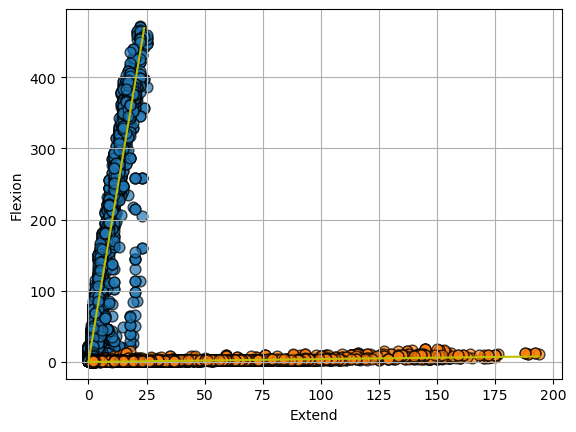

In [102]:
# taking only for the flexion and then extension, normalised NO FB
flex_x, flex_y = find_flex_data(emg1_norm, emg2_norm)
ex_x, ex_y = find_ex_data(emg1_norm, emg2_norm)


# change lists to numpy array for the polyfit
# NO FB
sub4_flex_x = np.array(flex_x)
sub4_flex_y = np.array(flex_y)
sub4_ex_x = np.array(ex_x)
sub4_ex_y = np.array(ex_y)

#find line of best fit
# NO FB
sub4_a, sub4_b = np.polyfit(sub4_flex_x, sub4_flex_y, 1)
sub4_b = 0
print(f"slope flex: {sub4_a}, y axis flex: {sub4_b}")
sub4_c, sub4_d = np.polyfit(sub4_ex_x, sub4_ex_y, 1)
sub4_d = 0
print(f"slope ex: {sub4_c}, y axis ex: {sub4_d}")


#add points to plot
plt.scatter(sub4_flex_x, sub4_flex_y, s=60, alpha=0.7, edgecolors="k")
plt.scatter(sub4_ex_x,   sub4_ex_y,   s=60, alpha=0.7, edgecolors="k")


#add line of best fit to plot
# Create sequence of 100 numbers from 0 to max value
sub4_xseq_flex = np.linspace(0, 24, num=100)
plt.plot(sub4_xseq_flex, sub4_a*sub4_xseq_flex+sub4_b, color='y')

# Create sequence of 100 numbers from 0 to max value
sub4_xseq_ex = np.linspace(0, max(sub4_ex_x), num=100)
plt.plot(sub4_xseq_ex, sub4_c*sub4_xseq_ex+sub4_d, color='y')

plt.xlabel("Extend")
plt.ylabel("Flexion")
plt.grid()
plt.show() 

With feedback

feedback, slope flex: 18.16468880765339, feedback, y axis flex: 0
feedback, slope ex: 0.03074537027615711, feedback, y axis flex: 0


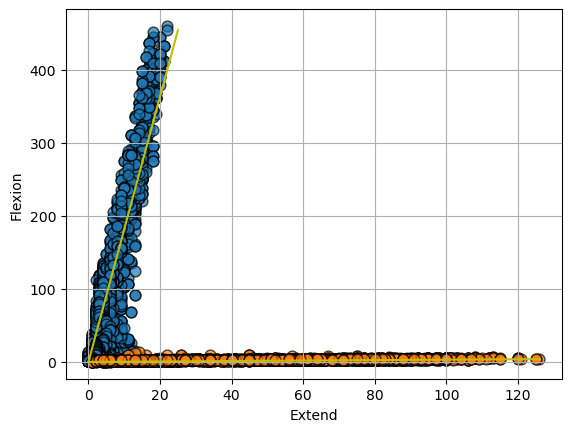

In [103]:
# normalised WITH FB
flex_x_feed, flex_y_feed = find_flex_data(emg1_norm_feed, emg2_norm_feed)
ex_x_feed, ex_y_feed = find_ex_data(emg1_norm_feed, emg2_norm_feed)


# WITH FB, create numpy arrays
sub4_flex_x_feed = np.array(flex_x_feed)
sub4_flex_y_feed = np.array(flex_y_feed)
sub4_ex_x_feed = np.array(ex_x_feed)
sub4_ex_y_feed = np.array(ex_y_feed)


# find line of best fit
# WITH FB
sub4_a_feed, sub4_b_feed = np.polyfit(sub4_flex_x_feed, sub4_flex_y_feed, 1)
sub4_b_feed = 0
print(f"feedback, slope flex: {sub4_a_feed}, feedback, y axis flex: {sub4_b_feed}")
sub4_c_feed, sub4_d_feed = np.polyfit(sub4_ex_x_feed, sub4_ex_y_feed, 1)
sub4_d_feed = 0
print(f"feedback, slope ex: {sub4_c_feed}, feedback, y axis flex: {sub4_d_feed}")

plt.scatter(sub4_flex_x_feed, sub4_flex_y_feed,   s=60, alpha=0.7, edgecolors="k")
plt.scatter(sub4_ex_x_feed,   sub4_ex_y_feed,     s=60, alpha=0.7, edgecolors="k")

# Create sequence of 100 numbers from 0 to max value
sub4_xseq_flex_feed = np.linspace(0, 25, num=100)
plt.plot(sub4_xseq_flex_feed, sub4_a_feed*sub4_xseq_flex_feed+sub4_b_feed, color='y')

# Create sequence of 100 numbers from 0 to max value
sub4_xseq_ex_feed = np.linspace(0, max(sub4_ex_x_feed), num=100)
plt.plot(sub4_xseq_ex_feed, sub4_c_feed*sub4_xseq_ex_feed+sub4_d_feed, color='y')

plt.xlabel("Extend")
plt.ylabel("Flexion")
plt.grid()
plt.show() 

Plot together

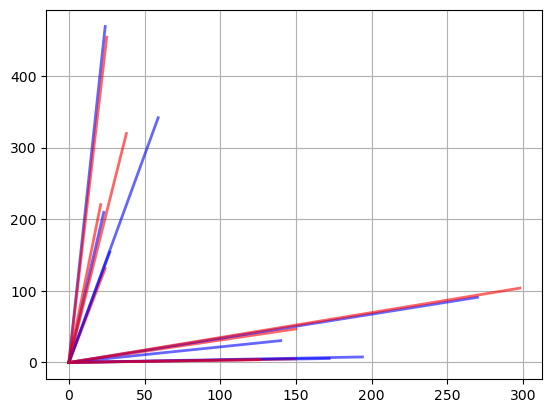

In [104]:
# Subject 1
# without feedback
plt.plot(sub1_xseq_flex, sub1_a*sub1_xseq_flex+sub1_b, color='b',  alpha = 0.6, linewidth = 2)
plt.plot(sub1_xseq_ex,   sub1_c*sub1_xseq_ex+sub1_d,   color='b' , alpha = 0.6, linewidth = 2)
# with feedback
plt.plot(sub1_xseq_flex_feed, sub1_a_feed*sub1_xseq_flex_feed+sub1_b_feed, color='r' , alpha = 0.6 , linewidth = 2)
plt.plot(sub1_xseq_ex_feed,   sub1_c_feed*sub1_xseq_ex_feed+sub1_d_feed,   color='r' , alpha = 0.6 , linewidth = 2)

# Subject 2
# without feedback
plt.plot(sub2_xseq_flex, sub2_a*sub2_xseq_flex+sub2_b, color='b',  alpha = 0.6, linewidth = 2)
plt.plot(sub2_xseq_ex,   sub2_c*sub2_xseq_ex  +sub2_d, color='b' , alpha = 0.6, linewidth = 2)
# with feedback
plt.plot(sub2_xseq_flex_feed, sub2_a_feed*sub2_xseq_flex_feed+sub2_b_feed, color='r' , alpha = 0.6 , linewidth = 2)
plt.plot(sub2_xseq_ex_feed,   sub2_c_feed*sub2_xseq_ex_feed  +sub2_d_feed, color='r' , alpha = 0.6 , linewidth = 2)

# Subject 3
# without feedback
plt.plot(sub3_xseq_flex, sub3_a*sub3_xseq_flex+sub3_b, color='b',  alpha = 0.6, linewidth = 2)
plt.plot(sub3_xseq_ex,   sub3_c*sub3_xseq_ex  +sub3_d, color='b' , alpha = 0.6, linewidth = 2)
# with feedback
plt.plot(sub3_xseq_flex_feed, sub3_a_feed*sub3_xseq_flex_feed+sub3_b_feed, color='r' , alpha = 0.6 , linewidth = 2)
plt.plot(sub3_xseq_ex_feed,   sub3_c_feed*sub3_xseq_ex_feed  +sub3_d_feed, color='r' , alpha = 0.6 , linewidth = 2)

# Subject 4
# without feedback
plt.plot(sub4_xseq_flex, sub4_a*sub4_xseq_flex+sub4_b, color='b',  alpha = 0.6, linewidth = 2)
plt.plot(sub4_xseq_ex,   sub4_c*sub4_xseq_ex  +sub4_d, color='b' , alpha = 0.6, linewidth = 2)
# with feedback
plt.plot(sub4_xseq_flex_feed, sub4_a_feed*sub4_xseq_flex_feed+sub4_b_feed, color='r' , alpha = 0.6 , linewidth = 2)
plt.plot(sub4_xseq_ex_feed,   sub4_c_feed*sub4_xseq_ex_feed  +sub4_d_feed, color='r' , alpha = 0.6 , linewidth = 2)

plt.grid()
plt.show() 

# Subject 5, Age: 24

In [105]:
# MVC,124,MVC,350

MVC_M1 = 124
MVC_M2 = 350
 
MVC_M1_SCALED = MVC_M1*0.8
MVC_M2_SCALED = MVC_M2*0.8


with open('EMG_Users\Heidrun_raw_nofeedback.csv') as file:
        csv_reader = csv.reader(file, delimiter=',')

        line_count = 0
        emg1_raw = []
        emg2_raw = []
        emg1_norm = []
        emg2_norm = []
        for row in csv_reader:
            line_count += 1
            if line_count > 2:
                emg1, emg2 = map(int, row)
                M1_norm, M2_norm = normalise(emg1, emg2, MVC_M1_SCALED, MVC_M1_SCALED)
                emg1_raw.append(emg1)
                emg2_raw.append(emg2)
                emg1_norm.append(M1_norm)
                emg2_norm.append(M2_norm)


with open('EMG_Users\Heidrun_raw_feedback.csv') as file:
        csv_reader = csv.reader(file, delimiter=',')

        line_count = 0
        emg1_raw_feed = []
        emg2_raw_feed = []
        emg1_norm_feed = []
        emg2_norm_feed = []
        for row in csv_reader:
            line_count += 1
            if line_count > 2:
                emg1_feed, emg2_feed = map(int, row)
                M1_norm_feed, M2_norm_feed = normalise(emg1_feed, emg2_feed, MVC_M1_SCALED, MVC_M1_SCALED)
                emg1_raw_feed.append(emg1_feed)
                emg2_raw_feed.append(emg2_feed)
                emg1_norm_feed.append(M1_norm_feed)
                emg2_norm_feed.append(M2_norm_feed)

No feedback

slope flex: 11.389503360232942, y axis flex: 0
slope ex: 0.11447849392272971, y axis ex: 0


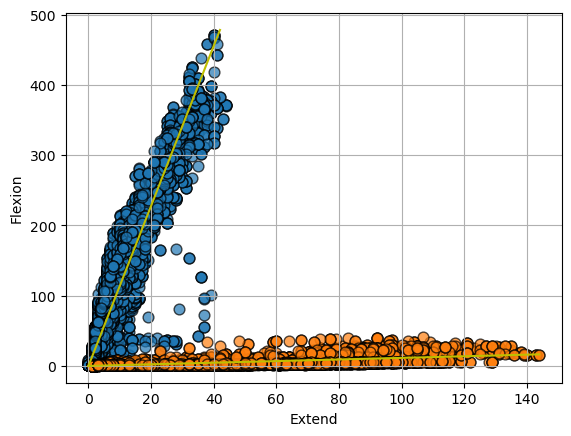

In [106]:
# taking only for the flexion and then extension, normalised NO FB
flex_x, flex_y = find_flex_data(emg1_norm, emg2_norm)
ex_x, ex_y = find_ex_data(emg1_norm, emg2_norm)


# filter outliers for flexion
flex_x_filter = []
flex_y_filter = []
for i in range(len(flex_x)):
    if (flex_x[i] > 40 and flex_y[i] < 200):
        pass
    else:
        flex_x_filter.append(flex_x[i])
        flex_y_filter.append(flex_y[i])

# filter outliers for extension
ex_x_filter = []
ex_y_filter = []
for i in range(len(ex_x)):
    if (ex_x[i] > 100 and ex_y[i] > 50):
        pass
    else:
        ex_x_filter.append(ex_x[i])
        ex_y_filter.append(ex_y[i])

# change lists to numpy array for the polyfit
# NO FB
sub5_flex_x = np.array(flex_x_filter)
sub5_flex_y = np.array(flex_y_filter)
sub5_ex_x = np.array(ex_x_filter)
sub5_ex_y = np.array(ex_y_filter)

#find line of best fit
# NO FB
sub5_a, sub5_b = np.polyfit(sub5_flex_x, sub5_flex_y, 1)
sub5_b = 0
print(f"slope flex: {sub5_a}, y axis flex: {sub5_b}")
sub5_c, sub5_d = np.polyfit(sub5_ex_x, sub5_ex_y, 1)
sub5_d = 0
print(f"slope ex: {sub5_c}, y axis ex: {sub5_d}")


#add points to plot
plt.scatter(sub5_flex_x, sub5_flex_y, s=60, alpha=0.7, edgecolors="k")
plt.scatter(sub5_ex_x,   sub5_ex_y,   s=60, alpha=0.7, edgecolors="k")


#add line of best fit to plot
# Create sequence of 100 numbers from 0 to max value
sub5_xseq_flex = np.linspace(0,42, num=100)
plt.plot(sub5_xseq_flex, sub5_a*sub5_xseq_flex+sub5_b, color='y')

# Create sequence of 100 numbers from 0 to max value
sub5_xseq_ex = np.linspace(0, max(sub5_ex_x), num=100)
plt.plot(sub5_xseq_ex, sub5_c*sub5_xseq_ex+sub5_d, color='y')

plt.xlabel("Extend")
plt.ylabel("Flexion")
plt.grid()
plt.show() 

With feedback

feedback, slope flex: 11.889948212117321, feedback, y axis flex: 0
feedback, slope ex: 0.2317789737792299, feedback, y axis flex: 0


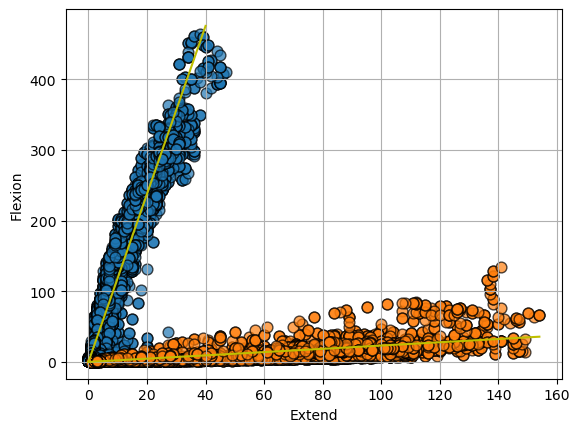

In [107]:
# normalised WITH FB
flex_x_feed, flex_y_feed = find_flex_data(emg1_norm_feed, emg2_norm_feed)
ex_x_feed, ex_y_feed = find_ex_data(emg1_norm_feed, emg2_norm_feed)


# filter outliers for flexion
flex_x_feed_filter = []
flex_y_feed_filter = []
for i in range(len(flex_x_feed)):
    if (flex_x_feed[i] > 30 and flex_y_feed[i] < 200):
        pass
    else:
        flex_x_feed_filter.append(flex_x_feed[i])
        flex_y_feed_filter.append(flex_y_feed[i])

# WITH FB, create numpy arrays
sub5_flex_x_feed = np.array(flex_x_feed_filter)
sub5_flex_y_feed = np.array(flex_y_feed_filter)
sub5_ex_x_feed = np.array(ex_x_feed)
sub5_ex_y_feed = np.array(ex_y_feed)


# find line of best fit
# WITH FB
sub5_a_feed, sub5_b_feed = np.polyfit(sub5_flex_x_feed, sub5_flex_y_feed, 1)
sub5_b_feed = 0
print(f"feedback, slope flex: {sub5_a_feed}, feedback, y axis flex: {sub5_b_feed}")
sub5_c_feed, sub5_d_feed = np.polyfit(sub5_ex_x_feed, sub5_ex_y_feed, 1)
sub5_d_feed = 0
print(f"feedback, slope ex: {sub5_c_feed}, feedback, y axis flex: {sub5_d_feed}")

plt.scatter(sub5_flex_x_feed, sub5_flex_y_feed,   s=60, alpha=0.7, edgecolors="k")
plt.scatter(sub5_ex_x_feed,   sub5_ex_y_feed,     s=60, alpha=0.7, edgecolors="k")

# Create sequence of 100 numbers from 0 to max value
sub5_xseq_flex_feed = np.linspace(0, 40, num=100)
plt.plot(sub5_xseq_flex_feed, sub5_a_feed*sub5_xseq_flex_feed+sub5_b_feed, color='y')

# Create sequence of 100 numbers from 0 to max value
sub5_xseq_ex_feed = np.linspace(0, max(sub5_ex_x_feed), num=100)
plt.plot(sub5_xseq_ex_feed, sub5_c_feed*sub5_xseq_ex_feed+sub5_d_feed, color='y')

plt.xlabel("Extend")
plt.ylabel("Flexion")
plt.grid()
plt.show() 

Plot together

------------ SUBJECT 1 -----------
Flexion degree for TTA: 1 = 6.26
Extension degree for TTA: 1 = 12.28
Flexion degree for TTA: 1 with FB= 5.44
Extension degree for TTA: 1 with FB= 17.36
------------ SUBJECT 2 -----------
Flexion degree for TTA: 2 = 9.95
Extension degree for TTA: 2 = 1.84
Flexion degree for TTA: 2 with FB= 10.37
Extension degree for TTA: 2 with FB= 1.94
------------ SUBJECT 3 -----------
Flexion degree for TTA: 3 = 9.8
Extension degree for TTA: 3 = 18.62
Flexion degree for TTA: 3 with FB= 6.78
Extension degree for TTA: 3 with FB= 19.2
------------ SUBJECT 4 -----------
Flexion degree for TTA: 4 = 2.93
Extension degree for TTA: 4 = 2.28
Flexion degree for TTA: 4 with FB= 3.15
Extension degree for TTA: 4 with FB= 1.76
------------ SUBJECT 5 -----------
Flexion degree for TTA: 5 = 5.02
Extension degree for TTA: 5 = 6.53
Flexion degree for TTA: 5 with FB= 4.81
Extension degree for TTA: 5 with FB= 13.05


C:\Users\irfridriksdottir\AppData\Local\Temp\ipykernel_33600\3253002412.py:173: MatplotlibDeprecationWarning: An artist whose label starts with an underscore was passed to legend(); such artists will no longer be ignored in the future.  To suppress this warning, explicitly filter out such artists, e.g. with `[art for art in artists if not art.get_label().startswith('_')]`.
  plt.legend(['Sub:1', '_None', 'Sub:1 FB', '_None', 'Sub:2', '_None', 'Sub:2 FB', '_None' , 'Sub:3', '_None', 'Sub:3 FB', '_None' , 'Sub:4', '_None', 'Sub:4 FB', '_None' , 'Sub:5', '_None', 'Sub:5 FB', '_None'])


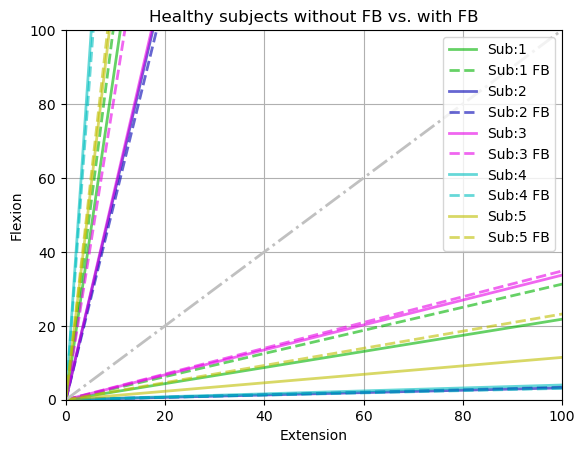

In [119]:
# Subject 1
print("------------ SUBJECT 1 -----------")
# without feedback
plt.plot(sub1_xseq_flex, sub1_a*sub1_xseq_flex+sub1_b, color=(0, 0.7, 0),  alpha = 0.6, linewidth = 2)
sub1_flex_deg_x =  sub1_xseq_flex
sub1_flex_deg_y =  sub1_a*sub1_xseq_flex+sub1_b
sub1_flex_deg = m.degrees(m.atan(sub1_flex_deg_x[80]/sub1_flex_deg_y[80]))
sub1_flex_deg = round(sub1_flex_deg,2)
print(f"Flexion degree for TTA: 1 = {sub1_flex_deg}")

plt.plot(sub1_xseq_ex,   sub1_c*sub1_xseq_ex+sub1_d,   color=(0, 0.7, 0) , alpha = 0.6, linewidth = 2)
sub1_ex_deg_x =  sub1_xseq_ex
sub1_ex_deg_y =  sub1_c*sub1_xseq_ex  +sub1_d
sub1_ex_deg = m.degrees(m.atan(sub1_ex_deg_y[80]/sub1_ex_deg_x[80]))
sub1_ex_deg = round(sub1_ex_deg,2)
print(f"Extension degree for TTA: 1 = {sub1_ex_deg}")

# with feedback
plt.plot(sub1_xseq_flex_feed, sub1_a_feed*sub1_xseq_flex_feed+sub1_b_feed, color=(0, 0.7, 0) , alpha = 0.6 , linewidth = 2, linestyle = '--')
sub1_flex_deg_x =  sub1_xseq_flex_feed
sub1_flex_deg_y =  sub1_a_feed*sub1_xseq_flex_feed+sub1_b_feed
sub1_flex_deg_fb = m.degrees(m.atan(sub1_flex_deg_x[80]/sub1_flex_deg_y[80]))
sub1_flex_deg_fb = round(sub1_flex_deg_fb,2)
print(f"Flexion degree for TTA: 1 with FB= {sub1_flex_deg_fb}")

plt.plot(sub1_xseq_ex_feed,   sub1_c_feed*sub1_xseq_ex_feed+sub1_d_feed,   color=(0, 0.7, 0) , alpha = 0.6 , linewidth = 2, linestyle = '--')
sub1_ex_deg_x =  sub1_xseq_ex_feed
sub1_ex_deg_y =  sub1_c_feed*sub1_xseq_ex_feed  +sub1_d_feed
sub1_ex_deg_fb = m.degrees(m.atan(sub1_ex_deg_y[80]/sub1_ex_deg_x[80]))
sub1_ex_deg_fb = round(sub1_ex_deg_fb,2)
print(f"Extension degree for TTA: 1 with FB= {sub1_ex_deg_fb}")


# Subject 2
print("------------ SUBJECT 2 -----------")
# without feedback
plt.plot(sub2_xseq_flex, sub2_a*sub2_xseq_flex+sub2_b, color=(0, 0, 0.7),  alpha = 0.6, linewidth = 2)
sub2_flex_deg_x =  sub2_xseq_flex
sub2_flex_deg_y =  sub2_a*sub2_xseq_flex+sub2_b
sub2_flex_deg = m.degrees(m.atan(sub2_flex_deg_x[80]/sub2_flex_deg_y[80]))
sub2_flex_deg = round(sub2_flex_deg,2)
print(f"Flexion degree for TTA: 2 = {sub2_flex_deg}")

plt.plot(sub2_xseq_ex,   sub2_c*sub2_xseq_ex  +sub2_d, color=(0, 0, 0.7) , alpha = 0.6, linewidth = 2)
sub2_ex_deg_x =  sub2_xseq_ex
sub2_ex_deg_y =  sub2_c*sub2_xseq_ex  +sub2_d
sub2_ex_deg = m.degrees(m.atan(sub2_ex_deg_y[80]/sub2_ex_deg_x[80]))
sub2_ex_deg = round(sub2_ex_deg,2)
print(f"Extension degree for TTA: 2 = {sub2_ex_deg}")

# with feedback
plt.plot(sub2_xseq_flex_feed, sub2_a_feed*sub2_xseq_flex_feed+sub2_b_feed, color=(0, 0, 0.7) , alpha = 0.6 , linewidth = 2, linestyle = '--')
sub2_flex_deg_x =  sub2_xseq_flex_feed
sub2_flex_deg_y =  sub2_a_feed*sub2_xseq_flex_feed+sub2_b_feed
sub2_flex_deg_fb = m.degrees(m.atan(sub2_flex_deg_x[80]/sub2_flex_deg_y[80]))
sub2_flex_deg_fb = round(sub2_flex_deg_fb,2)
print(f"Flexion degree for TTA: 2 with FB= {sub2_flex_deg_fb}")

plt.plot(sub2_xseq_ex_feed,   sub2_c_feed*sub2_xseq_ex_feed  +sub2_d_feed, color=(0, 0, 0.7) , alpha = 0.6 , linewidth = 2, linestyle = '--')
sub2_ex_deg_x =  sub2_xseq_ex_feed
sub2_ex_deg_y =  sub2_c_feed*sub2_xseq_ex_feed  +sub2_d_feed
sub2_ex_deg_fb = m.degrees(m.atan(sub2_ex_deg_y[80]/sub2_ex_deg_x[80]))
# use only with first 2 digits
sub2_ex_deg_fb = round(sub2_ex_deg_fb,2)
print(f"Extension degree for TTA: 2 with FB= {sub2_ex_deg_fb}")

# Subject 3
print("------------ SUBJECT 3 -----------")
# without feedback
plt.plot(sub3_xseq_flex, sub3_a*sub3_xseq_flex+sub3_b, color=(0.9, 0, 0.9),  alpha = 0.6, linewidth = 2)
sub3_flex_deg_x =  sub3_xseq_flex
sub3_flex_deg_y =  sub3_a*sub3_xseq_flex+sub3_b
sub3_flex_deg = m.degrees(m.atan(sub3_flex_deg_x[80]/sub3_flex_deg_y[80]))
sub3_flex_deg = round(sub3_flex_deg,2)
print(f"Flexion degree for TTA: 3 = {sub3_flex_deg}")

plt.plot(sub3_xseq_ex,   sub3_c*sub3_xseq_ex  +sub3_d, color=(0.9, 0, 0.9) , alpha = 0.6, linewidth = 2)
sub3_ex_deg_x =  sub3_xseq_ex
sub3_ex_deg_y =  sub3_c*sub3_xseq_ex  +sub3_d
sub3_ex_deg = m.degrees(m.atan(sub3_ex_deg_y[80]/sub3_ex_deg_x[80]))
sub3_ex_deg = round(sub3_ex_deg,2)
print(f"Extension degree for TTA: 3 = {sub3_ex_deg}")

# with feedback
plt.plot(sub3_xseq_flex_feed, sub3_a_feed*sub3_xseq_flex_feed+sub3_b_feed, color=(0.9, 0, 0.9) , alpha = 0.6 , linewidth = 2, linestyle = '--')
sub3_flex_deg_x =  sub3_xseq_flex_feed
sub3_flex_deg_y =  sub3_a_feed*sub3_xseq_flex_feed+sub3_b_feed
sub3_flex_deg_fb = m.degrees(m.atan(sub3_flex_deg_x[80]/sub3_flex_deg_y[80]))
sub3_flex_deg_fb = round(sub3_flex_deg_fb,2)
print(f"Flexion degree for TTA: 3 with FB= {sub3_flex_deg_fb}")

plt.plot(sub3_xseq_ex_feed,   sub3_c_feed*sub3_xseq_ex_feed  +sub3_d_feed, color=(0.9, 0, 0.9) , alpha = 0.6 , linewidth = 2, linestyle = '--')
sub3_ex_deg_x =  sub3_xseq_ex_feed
sub3_ex_deg_y =  sub3_c_feed*sub3_xseq_ex_feed  +sub3_d_feed
sub3_ex_deg_fb = m.degrees(m.atan(sub3_ex_deg_y[80]/sub3_ex_deg_x[80]))
sub3_ex_deg_fb = round(sub3_ex_deg_fb,2)
print(f"Extension degree for TTA: 3 with FB= {sub3_ex_deg_fb}")

# Subject 4
print("------------ SUBJECT 4 -----------")
# without feedback
plt.plot(sub4_xseq_flex, sub4_a*sub4_xseq_flex+sub4_b, color=(0, 0.75, 0.75),  alpha = 0.6, linewidth = 2)
sub4_flex_deg_x =  sub4_xseq_flex
sub4_flex_deg_y =  sub4_a*sub4_xseq_flex+sub4_b
sub4_flex_deg = m.degrees(m.atan(sub4_flex_deg_x[80]/sub4_flex_deg_y[80]))
sub4_flex_deg = round(sub4_flex_deg,2)
print(f"Flexion degree for TTA: 4 = {sub4_flex_deg}")

plt.plot(sub4_xseq_ex,   sub4_c*sub4_xseq_ex  +sub4_d, color=(0, 0.75, 0.75) , alpha = 0.6, linewidth = 2)
sub4_ex_deg_x =  sub4_xseq_ex
sub4_ex_deg_y =  sub4_c*sub4_xseq_ex  +sub4_d
sub4_ex_deg = m.degrees(m.atan(sub4_ex_deg_y[80]/sub4_ex_deg_x[80]))
sub4_ex_deg = round(sub4_ex_deg,2)
print(f"Extension degree for TTA: 4 = {sub4_ex_deg}")
# with feedback
plt.plot(sub4_xseq_flex_feed, sub4_a_feed*sub4_xseq_flex_feed+sub4_b_feed, color=(0, 0.75, 0.75) , alpha = 0.6 , linewidth = 2, linestyle = '--')
sub4_flex_deg_x =  sub4_xseq_flex_feed
sub4_flex_deg_y =  sub4_a_feed*sub4_xseq_flex_feed+sub4_b_feed
sub4_flex_deg_fb = m.degrees(m.atan(sub4_flex_deg_x[80]/sub4_flex_deg_y[80]))
sub4_flex_deg_fb = round(sub4_flex_deg_fb,2)
print(f"Flexion degree for TTA: 4 with FB= {sub4_flex_deg_fb}")

plt.plot(sub4_xseq_ex_feed,   sub4_c_feed*sub4_xseq_ex_feed  +sub4_d_feed, color=(0, 0.75, 0.75) , alpha = 0.6 , linewidth = 2, linestyle = '--')
sub4_ex_deg_x =  sub4_xseq_ex_feed
sub4_ex_deg_y =  sub4_c_feed*sub4_xseq_ex_feed  +sub4_d_feed
sub4_ex_deg_fb = m.degrees(m.atan(sub4_ex_deg_y[80]/sub4_ex_deg_x[80]))
sub4_ex_deg_fb = round(sub4_ex_deg_fb,2)
print(f"Extension degree for TTA: 4 with FB= {sub4_ex_deg_fb}")

# Subject 5
print("------------ SUBJECT 5 -----------")
# without feedback
plt.plot(sub5_xseq_flex, sub5_a*sub5_xseq_flex+sub5_b, color=(0.75, 0.75, 0),  alpha = 0.6, linewidth = 2)
sub5_flex_deg_x =  sub5_xseq_flex
sub5_flex_deg_y =  sub5_a*sub5_xseq_flex+sub5_b
sub5_flex_deg = m.degrees(m.atan(sub5_flex_deg_x[80]/sub5_flex_deg_y[80]))
sub5_flex_deg = round(sub5_flex_deg,2)
print(f"Flexion degree for TTA: 5 = {sub5_flex_deg}")

plt.plot(sub5_xseq_ex,   sub5_c*sub5_xseq_ex  +sub5_d, color=(0.75, 0.75, 0) , alpha = 0.6, linewidth = 2)
sub5_ex_deg_x =  sub5_xseq_ex
sub5_ex_deg_y =  sub5_c*sub5_xseq_ex  +sub5_d
sub5_ex_deg = m.degrees(m.atan(sub5_ex_deg_y[80]/sub5_ex_deg_x[80]))
sub5_ex_deg = round(sub5_ex_deg,2)
print(f"Extension degree for TTA: 5 = {sub5_ex_deg}")

# with feedback
plt.plot(sub5_xseq_flex_feed, sub5_a_feed*sub5_xseq_flex_feed+sub5_b_feed, color=(0.75, 0.75, 0) , alpha = 0.6 , linewidth = 2, linestyle = '--')
sub5_flex_deg_x =  sub5_xseq_flex_feed
sub5_flex_deg_y =  sub5_a_feed*sub5_xseq_flex_feed+sub5_b_feed
sub5_flex_deg_fb = m.degrees(m.atan(sub5_flex_deg_x[80]/sub5_flex_deg_y[80]))
sub5_flex_deg_fb = round(sub5_flex_deg_fb,2)
print(f"Flexion degree for TTA: 5 with FB= {sub5_flex_deg_fb}")

plt.plot(sub5_xseq_ex_feed,   sub5_c_feed*sub5_xseq_ex_feed  +sub5_d_feed, color=(0.75, 0.75, 0) , alpha = 0.6 , linewidth = 2, linestyle = '--')
sub5_ex_deg_x =  sub5_xseq_ex_feed
sub5_ex_deg_y =  sub5_c_feed*sub5_xseq_ex_feed  +sub5_d_feed
sub5_ex_deg_fb = m.degrees(m.atan(sub5_ex_deg_y[80]/sub5_ex_deg_x[80]))
sub5_ex_deg_fb = round(sub5_ex_deg_fb,2)
print(f"Extension degree for TTA: 5 with FB= {sub5_ex_deg_fb}")

# plot a dashed line in the middle
grey_line_x = [0 , 50 , 100]
grey_line_y = [0 , 50 , 100]
plt.plot(grey_line_x, grey_line_y, "-.", color = "silver", linewidth = 2)

plt.grid()
plt.xlim(0,100)
plt.ylim(0,100)
plt.title('Healthy subjects without FB vs. with FB')
plt.xlabel('Extension')
plt.ylabel('Flexion')
plt.legend(['Sub:1', '_None', 'Sub:1 FB', '_None', 'Sub:2', '_None', 'Sub:2 FB', '_None' , 'Sub:3', '_None', 'Sub:3 FB', '_None' , 'Sub:4', '_None', 'Sub:4 FB', '_None' , 'Sub:5', '_None', 'Sub:5 FB', '_None']) 
plt.show() 

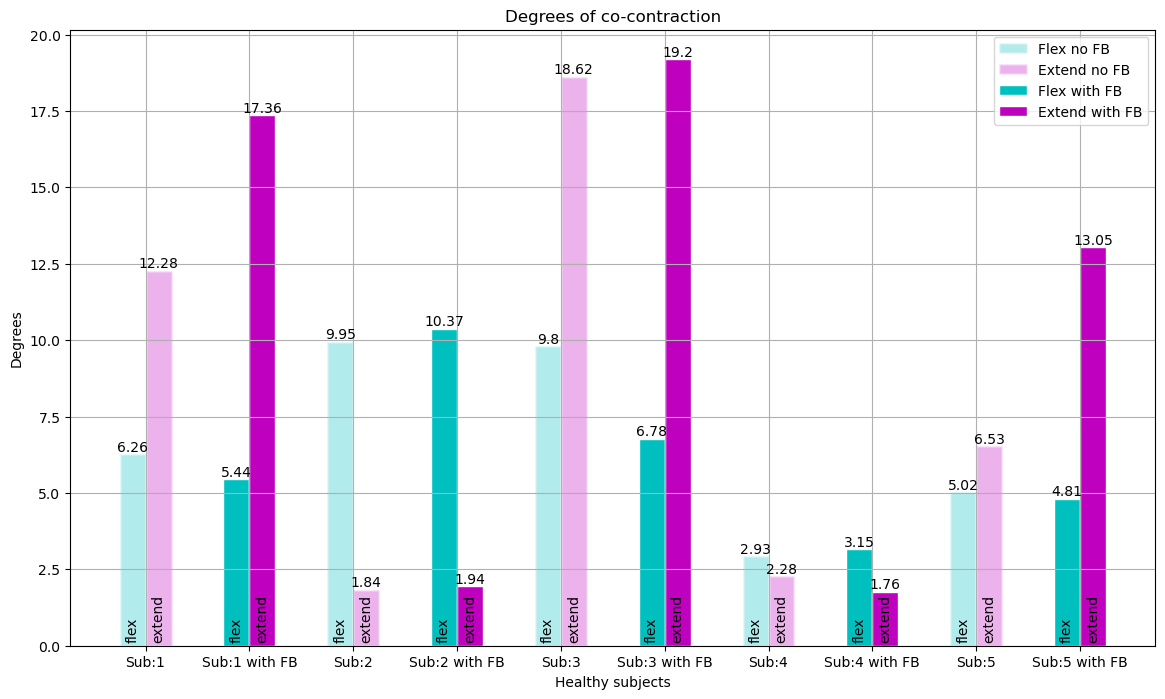

In [109]:
# red = decrease in co-contraction, green = increase in co-contraction
# flexion for TTA1 and TTA2 no FB
flex_1_5 = [sub1_flex_deg, sub2_flex_deg, sub3_flex_deg, sub4_flex_deg, sub5_flex_deg]
# Extension for TTA1 and TTA2 no FB
ex_1_5 = [sub1_ex_deg, sub2_ex_deg, sub3_ex_deg, sub4_ex_deg, sub5_ex_deg]
# flexion for TTA1 and TTA2 with FB
flex_1_5_feed = [sub1_flex_deg_fb, sub2_flex_deg_fb, sub3_flex_deg_fb, sub4_flex_deg_fb, sub5_flex_deg_fb]
# Extension for TTA1 and TTA2 with FB
ex_1_5_feed = [sub1_ex_deg_fb, sub2_ex_deg_fb, sub3_ex_deg_fb, sub4_ex_deg_fb, sub5_ex_deg_fb]


subject_list = ["Sub:1", "Sub:1 with FB", "Sub:2", "Sub:2 with FB",  "Sub:3",  "Sub:3 with FB",  "Sub:4",  "Sub:4 with FB",  "Sub:5",  "Sub:5 with FB"]


# function to add value labels
def addlabel_flex(r,list):
    for i in range(len(list)):
        plt.text(r[i], 0.2, "flex", ha = 'center', rotation = 90)

def addlabel_ex(r,list):
    for i in range(len(list)):
        plt.text(r[i], 0.2, "extend", ha = 'center', rotation = 90)

def addvalue(r,list):
    for i in range(len(list)):
        plt.text(r[i], list[i]+0.1, list[i], ha = 'center')


width = 0.25

r = [1,2,3,4,5,6,7,8,9,10]

r_flex = [1,3,5,7,9]
r_ex = [x + width for x in r_flex]



r_flex_feed = [2,4,6,8,10]
r_ex_feed = [x + width for x in r_flex_feed]

r_middle = [x + 0.5*width for x in r]

plt.figure(figsize=(14,8))
plt.bar(r_flex, flex_1_5, color = "c", alpha = 0.3,  width = width, edgecolor = 'white', linewidth = 2, label="Flex no FB")
plt.bar(r_ex, ex_1_5, color = "m",     alpha = 0.3,   width = width, edgecolor = 'white', linewidth = 2, label = "Extend no FB")


plt.bar(r_flex_feed, flex_1_5_feed , color = "c",    width = width, edgecolor = 'white', label = "Flex with FB")
plt.bar(r_ex_feed, ex_1_5_feed ,     color = "m",    width = width, edgecolor = 'white', label = "Extend with FB")

addlabel_flex(r_flex, flex_1_5)
addlabel_flex(r_flex_feed, flex_1_5_feed)

addlabel_ex(r_ex, ex_1_5)
addlabel_ex(r_ex_feed, ex_1_5)

addvalue(r_flex, flex_1_5)
addvalue(r_flex_feed, flex_1_5_feed)
addvalue(r_ex, ex_1_5)
addvalue(r_ex_feed, ex_1_5_feed)


plt.xlabel("Healthy subjects") 
plt.ylabel("Degrees")  
plt.xticks(r_middle ,subject_list) 

# plt.ylim(0,20)
plt.legend(loc = "upper right")
plt.title("Degrees of co-contraction")
plt.grid()
plt.show()

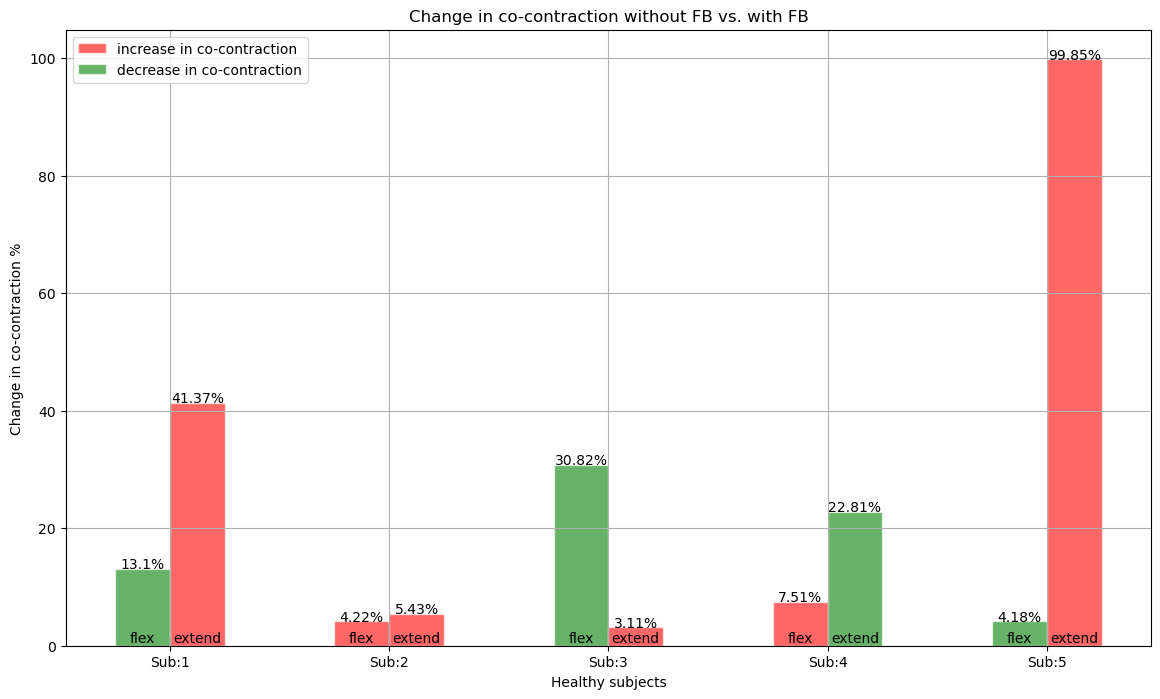

In [110]:
# minus = decrease in co-contraction, plus = increase in co-contraction
# SUB 1
delta_flex_sub1 = [round((sub1_flex_deg - sub1_flex_deg_fb)/sub1_flex_deg*100,2)] #green
delta_ex_sub1 = [round((sub1_ex_deg - sub1_ex_deg_fb)/sub1_ex_deg*100*-1,2)] #red
# SUB 2
delta_flex_sub2 = [round((sub2_flex_deg - sub2_flex_deg_fb)/sub2_flex_deg*100*-1,2)] #red
delta_ex_sub2 = [round((sub2_ex_deg - sub2_ex_deg_fb)/sub2_ex_deg*100*-1,2)] #red
# SUB 3
delta_flex_sub3 = [round((sub3_flex_deg - sub3_flex_deg_fb)/sub3_flex_deg*100,2)] #green
delta_ex_sub3 = [round((sub3_ex_deg - sub3_ex_deg_fb)/sub3_ex_deg*100*-1,2)] #red
# SUB 4
delta_flex_sub4 = [round((sub4_flex_deg - sub4_flex_deg_fb)/sub4_flex_deg*100*-1,2)] #red
delta_ex_sub4 = [round((sub4_ex_deg - sub4_ex_deg_fb)/sub4_ex_deg*100,2)] #green
# SUB 5
delta_flex_sub5 = [round((sub5_flex_deg - sub5_flex_deg_fb)/sub5_flex_deg*100,2)] #green
delta_ex_sub5 = [round((sub5_ex_deg - sub5_ex_deg_fb)/sub5_ex_deg*100*-1,2)] #red

subject_list = ["Sub:1", "Sub:2", "Sub:3", "Sub:4", "Sub:5"]
width = 0.25

# function to add value labels
def addlabel_flex(r,list):
    for i in range(len(list)):
        plt.text(r[i], 0.5, "flex", ha = 'center', rotation = 0)

def addlabel_ex(r,list):
    for i in range(len(list)):
        plt.text(r[i], 0.5, "extend", ha = 'center', rotation = 0)


def addvalue(r,list):
    for i in range(len(list)):
        plt.text(r[i], list[i], f"{list[i]}%", ha = 'center')

r_1 = [1,2,3,4,5]

r1_flex_sub1 = [1]
r1_flex_sub2 = [2]
r1_flex_sub3 = [3]
r1_flex_sub4 = [4]
r1_flex_sub5 = [5]

r2_ex_sub1 = [1+width]
r2_ex_sub2 = [2+width]
r2_ex_sub3 = [3+width]
r2_ex_sub4 = [4+width]
r2_ex_sub5 = [5+width]

r_middle = [x + 0.5*width for x in r_1]

plt.figure(figsize=(14,8))
# flexion
plt.bar(r1_flex_sub1, delta_flex_sub1, color = 'g', alpha=0.6, width = width, edgecolor = 'white', label= "_None")
plt.bar(r1_flex_sub2, delta_flex_sub2, color = 'r',alpha=0.6 ,width = width, edgecolor = 'white',label= "_None")
plt.bar(r1_flex_sub3, delta_flex_sub3, color = 'g',alpha=0.6 ,width = width, edgecolor = 'white',label= "_None")
plt.bar(r1_flex_sub4, delta_flex_sub4, color = 'r',alpha=0.6 ,width = width, edgecolor = 'white',label= "_None")
plt.bar(r1_flex_sub5, delta_flex_sub5, color = 'g',alpha=0.6 ,width = width, edgecolor = 'white',label= "_None")

# extension
plt.bar(r2_ex_sub1, delta_ex_sub1 , color = 'r',alpha = 0.6, width = width, edgecolor = 'white', label= "increase in co-contraction")
plt.bar(r2_ex_sub2, delta_ex_sub2 , color = 'r',alpha = 0.6, width = width, edgecolor = 'white', label="_None")
plt.bar(r2_ex_sub3, delta_ex_sub3 , color = 'r',alpha = 0.6, width = width, edgecolor = 'white', label="_None")
plt.bar(r2_ex_sub4, delta_ex_sub4 , color = 'g',alpha = 0.6, width = width, edgecolor = 'white', label="decrease in co-contraction")
plt.bar(r2_ex_sub5, delta_ex_sub5 , color = 'r',alpha = 0.6, width = width, edgecolor = 'white', label="_None")





addlabel_flex(r1_flex_sub1,delta_flex_sub1)
addlabel_flex(r1_flex_sub2,delta_flex_sub2)
addlabel_flex(r1_flex_sub3,delta_flex_sub3)
addlabel_flex(r1_flex_sub4,delta_flex_sub4)
addlabel_flex(r1_flex_sub5,delta_flex_sub5)


addlabel_ex(r2_ex_sub1,delta_ex_sub1)
addlabel_ex(r2_ex_sub2,delta_ex_sub2)
addlabel_ex(r2_ex_sub3,delta_ex_sub3)
addlabel_ex(r2_ex_sub4,delta_ex_sub4)
addlabel_ex(r2_ex_sub5,delta_ex_sub5)

addvalue(r1_flex_sub1,delta_flex_sub1)
addvalue(r1_flex_sub2,delta_flex_sub2)
addvalue(r1_flex_sub3,delta_flex_sub3)
addvalue(r1_flex_sub4,delta_flex_sub4)
addvalue(r1_flex_sub5,delta_flex_sub5)


addvalue(r2_ex_sub1,delta_ex_sub1)
addvalue(r2_ex_sub2,delta_ex_sub2)
addvalue(r2_ex_sub3,delta_ex_sub3)
addvalue(r2_ex_sub4,delta_ex_sub4)
addvalue(r2_ex_sub5,delta_ex_sub5)

plt.title('Comparing degree values of co-contraction for flexion and extension no FB/with FB')
plt.xlabel("Healthy subjects") 
plt.ylabel("Change in co-contraction %") 
plt.xticks(r_middle ,subject_list) 
plt.title("Change in co-contraction without FB vs. with FB")
plt.legend()

plt.grid()
plt.show()

only plotting with no FB

C:\Users\irfridriksdottir\AppData\Local\Temp\ipykernel_33600\16218298.py:32: MatplotlibDeprecationWarning: An artist whose label starts with an underscore was passed to legend(); such artists will no longer be ignored in the future.  To suppress this warning, explicitly filter out such artists, e.g. with `[art for art in artists if not art.get_label().startswith('_')]`.
  plt.legend(['sub:1', '_None', 'sub:2', '_None', 'sub:3', '_None', 'sub:4', '_None', 'sub:5', '_None'])


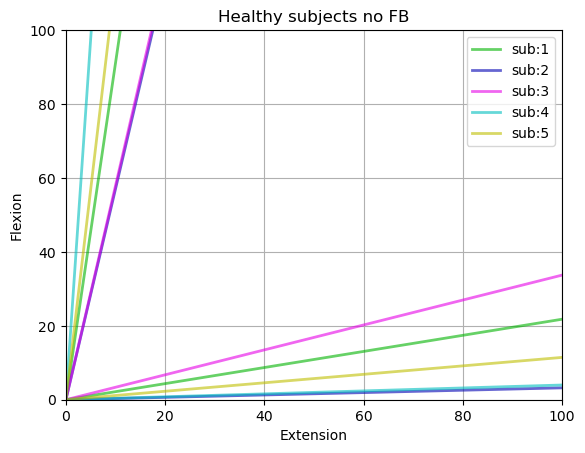

In [111]:
# Subject 1
# without feedback
plt.plot(sub1_xseq_flex, sub1_a*sub1_xseq_flex+sub1_b, color=(0, 0.7, 0),  alpha = 0.6, linewidth = 2)
plt.plot(sub1_xseq_ex,   sub1_c*sub1_xseq_ex+sub1_d,   color=(0, 0.7, 0) , alpha = 0.6, linewidth = 2)

# Subject 2
# without feedback
plt.plot(sub2_xseq_flex, sub2_a*sub2_xseq_flex+sub2_b, color=(0, 0, 0.7),  alpha = 0.6, linewidth = 2)
plt.plot(sub2_xseq_ex,   sub2_c*sub2_xseq_ex  +sub2_d, color=(0, 0, 0.7) , alpha = 0.6, linewidth = 2)

# Subject 3
# without feedback
plt.plot(sub3_xseq_flex, sub3_a*sub3_xseq_flex+sub3_b, color=(0.9, 0, 0.9),  alpha = 0.6, linewidth = 2)
plt.plot(sub3_xseq_ex,   sub3_c*sub3_xseq_ex  +sub3_d, color=(0.9, 0, 0.9) , alpha = 0.6, linewidth = 2)

# Subject 4
# without feedback
plt.plot(sub4_xseq_flex, sub4_a*sub4_xseq_flex+sub4_b, color=(0, 0.75, 0.75),  alpha = 0.6, linewidth = 2)
plt.plot(sub4_xseq_ex,   sub4_c*sub4_xseq_ex  +sub4_d, color=(0, 0.75, 0.75) , alpha = 0.6, linewidth = 2)

# Subject 5
# without feedback
plt.plot(sub5_xseq_flex, sub5_a*sub5_xseq_flex+sub5_b, color=(0.75, 0.75, 0),  alpha = 0.6, linewidth = 2)
plt.plot(sub5_xseq_ex,   sub5_c*sub5_xseq_ex  +sub5_d, color=(0.75, 0.75, 0) , alpha = 0.6, linewidth = 2)

plt.grid()
plt.xlim(0,100)
plt.ylim(0,100)
plt.title('Healthy subjects no FB')
plt.xlabel('Extension')
plt.ylabel('Flexion')
plt.legend(['sub:1', '_None', 'sub:2', '_None', 'sub:3', '_None', 'sub:4', '_None', 'sub:5', '_None']) 
plt.show() 

Only plotting with FB

C:\Users\irfridriksdottir\AppData\Local\Temp\ipykernel_33600\2599412067.py:32: MatplotlibDeprecationWarning: An artist whose label starts with an underscore was passed to legend(); such artists will no longer be ignored in the future.  To suppress this warning, explicitly filter out such artists, e.g. with `[art for art in artists if not art.get_label().startswith('_')]`.
  plt.legend(['sub:1 FB', '_None', 'sub:2 FB', '_None' , 'sub:3 FB', '_None' ,'sub:4 FB', '_None' , 'sub:5 FB', '_None'])


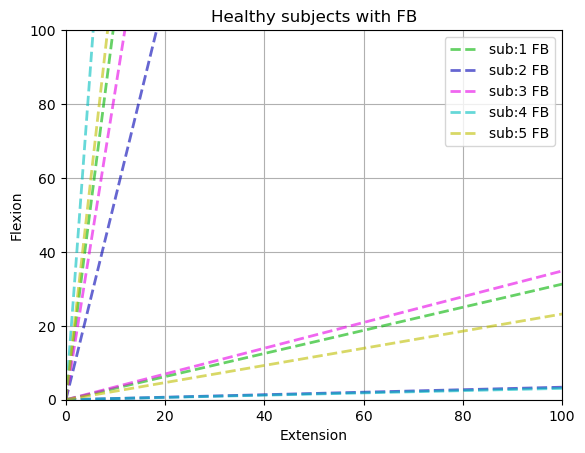

In [112]:
# Subject 1
# with feedback
plt.plot(sub1_xseq_flex_feed, sub1_a_feed*sub1_xseq_flex_feed+sub1_b_feed, color=(0, 0.7, 0) , alpha = 0.6 , linewidth = 2, linestyle = '--')
plt.plot(sub1_xseq_ex_feed,   sub1_c_feed*sub1_xseq_ex_feed+sub1_d_feed,   color=(0, 0.7, 0) , alpha = 0.6 , linewidth = 2, linestyle = '--')

# Subject 2
# with feedback
plt.plot(sub2_xseq_flex_feed, sub2_a_feed*sub2_xseq_flex_feed+sub2_b_feed, color=(0, 0, 0.7) , alpha = 0.6 , linewidth = 2, linestyle = '--')
plt.plot(sub2_xseq_ex_feed,   sub2_c_feed*sub2_xseq_ex_feed  +sub2_d_feed, color=(0, 0, 0.7) , alpha = 0.6 , linewidth = 2, linestyle = '--')

# Subject 3
# with feedback
plt.plot(sub3_xseq_flex_feed, sub3_a_feed*sub3_xseq_flex_feed+sub3_b_feed, color=(0.9, 0, 0.9) , alpha = 0.6 , linewidth = 2, linestyle = '--')
plt.plot(sub3_xseq_ex_feed,   sub3_c_feed*sub3_xseq_ex_feed  +sub3_d_feed, color=(0.9, 0, 0.9) , alpha = 0.6 , linewidth = 2, linestyle = '--')

# Subject 4
# with feedback
plt.plot(sub4_xseq_flex_feed, sub4_a_feed*sub4_xseq_flex_feed+sub4_b_feed, color=(0, 0.75, 0.75) , alpha = 0.6 , linewidth = 2, linestyle = '--')
plt.plot(sub4_xseq_ex_feed,   sub4_c_feed*sub4_xseq_ex_feed  +sub4_d_feed, color=(0, 0.75, 0.75) , alpha = 0.6 , linewidth = 2, linestyle = '--')

# Subject 5
# with feedback
plt.plot(sub5_xseq_flex_feed, sub5_a_feed*sub5_xseq_flex_feed+sub5_b_feed, color=(0.75, 0.75, 0) , alpha = 0.6 , linewidth = 2, linestyle = '--')
plt.plot(sub5_xseq_ex_feed,   sub5_c_feed*sub5_xseq_ex_feed  +sub5_d_feed, color=(0.75, 0.75, 0) , alpha = 0.6 , linewidth = 2, linestyle = '--')

plt.grid()
plt.xlim(0,100)
plt.ylim(0,100)
plt.title('Healthy subjects with FB')
plt.xlabel('Extension')
plt.ylabel('Flexion')
plt.legend(['sub:1 FB', '_None', 'sub:2 FB', '_None' , 'sub:3 FB', '_None' ,'sub:4 FB', '_None' , 'sub:5 FB', '_None']) 
plt.show() 